# INTRODUCTION
This project analyzes a dataset from the Google Play Store containing information on thousands of mobile applications. The main objective is to perform exploratory data analysis (EDA) by cleaning and transforming the dataset, engineering relevant features, and creating visualizations to uncover valuable insights into customer behavior and app preferences.

As the project is intended for showcasing and practicing purposes, some steps (mainly in the FE section) are not strictly necessary for the completion of the tasks or the final analysis.  
These intentional additions are meant to show familiraity with different data-preparation techniques.  
Additonally, while data cleaning and the feature engineering are often to be intertwined and occur simultenously in a real workflow, separating them into distinct sections was a deliberate choice to improve structure and clarity

**Data source**
The dataset was provided by udemy

## Tasks
a) Perform a general univariate analysis  
b) What are the most common prices for apps  
c) Hat are the most present apps in google playstore   
d) Which category has the largest number of installs  
e) What are th top most installed apps in each popular category

## Scope of the project
This study is part of a broader portfolio project designed to showcase my data analysis skills, including:
- Statistical reasoning
- Proficiency with core Python libraries (NumPy, Pandas, Matplotlib, Seaborn)
- Automation principles
- Overall analytical approach to working with structured data

The study is structured as follows:
1. Data Cleaning
2. Feature engineering
3. Exploratory data analysis

### Data cleaning
This section focuses on preparing the dataset for further analysis by identifying and handling duplicate records and missing values. It also includes correcting formatting issues and addressing any inconsistencies in the data.

### Feature enginerring
In this section, the dataset is transformed to include new or restructured variables that improve its suitability for analysis or modeling. This is a relatively small part of the project, as machine learning is not the final goal and most features are already formatted in a modeling-friendly way from the source.

### Exploratory data analysis
This section contains the core analytical work, broken into two complementary steps:

- Code-based exploration – Direct investigation using code and printed outputs, providing a quick, tabular overview of key findings.
- Visual exploration – Graphical representations of the same tasks to enhance clarity and allow for faster, more intuitive interpretation of the results.

By combining both approaches, the analysis aims to uncover meaningful insights into user behavior and app characteristics on the Google Play Store. 


# DATA CLEANING

In [1255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [1256]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [1257]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

### 1. UDERSTANDING THE DATA STRUCTURE

#### 1.1 Getting familiar with the dataset

In [1260]:
# Displaying the dataset 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1261]:
# Initial number of max rows (records) and column (features)
df.shape

(10841, 13)

In [1262]:
# Retrieving general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Insights
The output of .info() on the full dataset shows that several features contain missing values.
It also reveals that Rating is the only column stored as a numeric type, while other columns currently stored as strings should be converted to more appropriate data types.

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
#### 1.2 Finding unique values
This step aims to identify the unique values for each feature in the dataset.

Using .unique() is helpful for understanding the data type of a feature and gaining a preliminary view of how its records are structured and formatted.
However, when features have a large number of unique values, the output becomes difficult to interpret at a glance. To keep the results readable and concised, the following code excludes features with more than 50 unique entries.

That said, it's generally more effective to inspect a single feature individually using .unique() when a specific need arises.

In [1275]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [1387]:
for col in df:
        unique_count = df[col].nunique()
        
        if df[col].nunique() < 50:
            unique_value = []
            unique_value.append(df[col].unique())
            print(f"\n\n\033[91mThe unique values for {col} are:\033[0m\n\n {unique_value}")



The unique values for Category are:

 [array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)]


The unique values for Rating are:

 [array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])]


The unique values for Installs are:

 [array(['10,000+', '500,000

### INSIGHTS - DATA STRUCTURE

1. **App**
- Current Type: Categorical (object)
- Description: Name of the app.
- Unique values: 9,660; No missing values.
- No conversion needed

2. **Category**
- Current Type: Categorical (object)
- Description: Broad app category (e.g., ART_AND_DESIGN).
- Unique values: 36; No missing values.
- No conversion needed

3. **Rating**
- Current Type: Numerical (float64)
- Description: Average user rating (0.0 to 5.0).
- Unique values: 40; multiple missing values
- Already numeric – may require imputation for missing values.

5. **Reviews**
- Current Type: Categorical (object)
- Description: Total user reviews per app, stored as string.
- Unique values: 6,002; No missing values
- To be converted to numerical (integer)

6. **Size**
- Cuttent Type: Categorical (object)
- Description: App size in MB or KB (e.g., “19M”, “14k”, “Varies with device”).
- Unique values: 462; No missing values
- To be converted to numerical (float in MB; handle special values like "Varies with device")

7. **Installs**
- Current Type: Categorical (object)
- Description: App installs/downloads (e.g., “1,000+”).
- Unique values: 22; No missing values
- To be converted to integer (remove “+” and “,”)

8. **Type**
- Current Type: Categorical (object)
- Description: Free or Paid app.
- Unique values: 3; 1 missing value
- Can stay categorical – optionally encoded.

9. **Price**
- Curretn Type: Categorical (object)
- Description: App price (e.g., “$0.00”)
- Unique values: 93; No missing values
- To be converted to float (remove dollar sign)

10. **Content Rating**
- Current Type: Categorical (object)
- Description: Minimum age group (e.g., Everyone, Teen)
- Unique values: 6; 1 missing value
- Can stay categorical – optionally encoded.

11. **Genres**
- Current Type: Categorical (object)
- Description: App subcategory/genre (some are compound, e.g., “Art & Design;Pretend Play”)
- Unique values: 120; No missing values
- Can stay categorical – optionally encoded.

12. **Last Updated**
- Current Type: Categorical (object)
- Description: Last update date (e.g., “January 7, 2018”)
- Unique values: 1,378; No missing values
- To be converted to datetime

13. **Current Ver**
- Current Type: Categorical (object)
- Description: App version (e.g., “1.0.0”)
- Unique values: 2,832; few missing values
- Can remain as is – though version parsing is possible.

14. **Android Ver**
- Type: Categorical (object)
- Description: Minimum Android OS required (e.g., “4.0.3 and up”)
- Unique values: 33; few 3 missing values
- Can be cleaned and optionally converted to float or category or encoded

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [1280]:
df_copy = df.copy()

### 2. IDENTIFYING AND HANDLING DUPLICATES
In this dataset, duplicated rows do not carry additional information—each row represents a unique record, and if all metadata for an app is identical, it is considered a redundant repetition rather than a distinct instance of different behavior.

The following analysis is based on the assumption that the App feature should act as a primary key, meaning each row should correspond to a unique app, with all associated metadata referring to that single entity.

Therefore, the first step is to determine whether all duplicated rows share the same app name.

- If every duplicate row corresponds to a duplicated App, then removing exact duplicates would leave App as a valid primary key.
- However, if the number of duplicated rows differs from the number of duplicated App values, this suggests the presence of distinct rows sharing the same app name but with different metadata—indicating inconsistent or conflicting records.  

In the second case, further analysis is required to understand the discrepancies among repeated app entries and decide on an appropriate strategy for handling them.

In [1317]:
# Number of duplicate rows excluding the first instance 
duplicates = df_copy.duplicated().sum()
duplicates

483

In [1319]:
# Number of duplicate rows including the first instance
tot_duplicates = df_copy.duplicated(keep = False).sum()
tot_duplicates

893

In [1321]:
max_rows = df_copy.shape[0]
max_rows

10841

In [1323]:
# Percentage of idential/duplicate rows
percentage_dup = (duplicates/max_rows)*100
percentage_dup

4.455308550871691

In [1325]:
# Number of unique app names
df_copy['App'].nunique()

9660

In [1327]:
# Number of duplicate apps excluding the first instance
df_copy['App'].duplicated().sum()

1181

In [1329]:
# Number of duplicate apps including the first instance
df_copy['App'].duplicated(keep = False).sum()

1979

In [1331]:
# Double check for app that have the same name and are included in the general duplicates
df_copy[df_copy['App'].duplicated(keep=False) & df_copy.duplicated(keep=False)].shape #redundant

(893, 13)

The previous check tells that all the duplicated rows have also duplicated apps, as it was forseable.

In [1334]:
# Dropping all the duplicate rows except the first instance
df_copy.drop_duplicates(keep = 'first', inplace = True)

In [1337]:
# Checking if the drop_duplicates was performe succesfully
df_copy.duplicated().sum()

In [1343]:
df_copy.shape

(10358, 13)

### INSIGHTS
The number of duplicates identified at the dataset level does not fully match the count for the App feature, which indicates that some applications share the same name but differ in other attributes.

Although duplicate rows can be safely removed based on the considerations outlined at the beginning of this chapter, it remains important to further investigate the App feature to understand the source of these repetitions.

In any case, the proportion of duplicates relative to the total dataset (4.4%) is not high enough to raise concerns about the data collection process, nor would their removal represent a significant loss of information for this type of study.

The additional analysis will be included at the start of the EDA section.

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
### 3. IDENTIFYING AND HANDLING MISSING VALUES (preliminary inspection)
As informally indicated by the info in the first chapter, there are multiple features presenting missing values in different amounts.  
This section will focus on identifying such records and draw some initial insights and conclusions.
The proper analysis will be also conducted in the EDA chapter.

In [1381]:
# Comparing info from the original dataset with the current one
import io

datasets = [("df", df), ("df_copy", df_copy)]

for name, dtset in datasets:
    buffer = io.StringIO()
    dtset.info(buf=buffer)   # send output to buffer instead of printing
    info_str = buffer.getvalue()
    print('----------------------------------------')

    print(f"\033[91mDataset info for {name}:\033[0m\n")
    
    print(info_str)

----------------------------------------
Dataset info for df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB

----------------------------------------
Dataset info for df_copy:

<class 'pandas.core.frame.DataF

In [1392]:
# Comparing missing value in the original dataset with the current one
for name, dtset in datasets:
    print('----------------------------------------')
    print(f"\033[91mThe missing values for {name}:\033[0m\n")
    print(dtset.isnull().sum())


----------------------------------------
The missing values for df:

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
----------------------------------------
The missing values for df_copy:

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [1347]:
rating_null = df_copy['Rating'].isnull().sum()
rating_null

1465

In [1409]:
rating_total = df_copy.shape[0]
rating_total

10358

In [1411]:
rating_ratio = (rating_null/rating_total)*100
rating_ratio

14.143657076655725

In [1397]:
df_copy['Type'].isnull().sum()

1

In [1401]:
df_copy['Price'].isnull().sum()

0

In [1403]:
df_copy['Content Rating'].isnull().sum()

1

In [1413]:
curr_ver_null = df_copy['Current Ver'].isnull().sum()
curr_ver_null 

8

In [1415]:
curr_ver_ratio = (curr_ver_null/rating_total)*100
curr_ver_ratio

0.07723498744931453

In [1417]:
and_ver_null = df_copy['Android Ver'].isnull().sum()
and_ver_null

3

In [1419]:
and_ver_null = (and_ver_null/rating_total)*100
and_ver_null

0.028963120293492954

### INSIGHTS
As briefly outlined in the first chapter trought the .info() on the entire dataset, several features contain missing values in varying proportions.  

Especially Rating shows a concerning ratio of missing/total values amounting to 14.1% despite the duplicates dropping.  
For the remaining features containing missing values, the percentage is negligible, accounting for less than 0.1% of the total dataset. However, before dropping the corresponding rows, it is advisable to investigate these specific cases, as they may belong to important apps and could instead be addressed through an appropriate imputation method (though it seems hardly possible to impute features such the version of the app).

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
### 4.CONVERTING DATA TYPES

#### 4.1 Converting 'Reviews'

In [1054]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [1056]:
# Checking how many numeric and no numeric strings are in Reviews 
df_copy['Reviews'].str.isnumeric().value_counts().to_frame()

,count
Reviews,
True,10357
False,1


In [1058]:
# Retrieving the only no numeric record in Reviews
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### Insights

Here there's only one row not containing purely numbers: in fact, if we take a look at df['Reviews'].info() there are 10841 rows while, as we can see from df['Reviews'].str.isnumeric().sum(), there are 10840 rows containing only numbers. 
This leaves us with one row with a string containing at least something that is not a number

We can Either:
- drop the row
- convert 3M to number

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
##### 4.1.1 Handling the unusual record in Reviews

In [1062]:
# Converting the 
df_copy.loc[df['Reviews']=='3.0M', 'Reviews'] = 30000000

#We can use 2 more approaches:
#df_copy.iloc[10472, df_copy.columns.get_loc('Reviews')] = 30000000

#or

#df_copy.at[10472, 'Reviews'] = 3000000

In [1064]:
# Dropping the row at the index we found (10472)
# df_copy = df_copy.drop(df_copy.index[10472])

In [1066]:
# Checking if the row ws correctly removed
df_copy[df_copy['Reviews']=='3.0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

##### 4.1.2 Final Conversion

In [1071]:
df_copy['Reviews'].isnull().sum()

0

In [1073]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [1075]:
df_copy['Reviews'].info()

<class 'pandas.core.series.Series'>
Index: 10358 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
10358 non-null  int64
dtypes: int64(1)
memory usage: 161.8 KB


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
#### 4.2 Converting 'Size'

In [1079]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [1081]:
df_copy['Size'].isnull().sum()

0

In [1083]:
df_copy[['Size']]

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
...,...
10836,53M
10837,3.6M
10838,9.5M
10839,Varies with device


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [1086]:
# converting the M and k to number and 'Varies with device' to NaN
df_copy['Size'] = df_copy['Size'].str.replace('M','000000')
df_copy['Size'] = df_copy['Size'].str.replace('k','000')
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)#.astype(float)
df_copy['Size'] = df_copy['Size'].astype(float)
df_copy.head(2)

ValueError: could not convert string to float: '1,000+'

##### NOTE
Another ValueError has been raised, higlighting the presence of a unexpected format for one record in Size

The error has been intentionally left as a prove of the process.

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
##### 4.2.1 Handling the unusual record in 'Size'

In [1090]:
df_copy[df_copy['Size'] == '1,000+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,30000000,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


##### NOTE:
this is the same row from before earlier when the issue of Reviews having a record store as '3.0M'. 
Given the fact that imptutating 1000+ is impossible and it's only row, it appears reasonable to just drop the row at once.

In [1093]:
df_copy.drop(10472, inplace = True)

In [1095]:
df_copy[df_copy['Size'] == '1,000+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
##### 4.2.2 Final conversion

In [1098]:
#We can unify all the M (=milion=000000) and K (=thousand=000)
df_copy['Size'] = df_copy['Size'].str.replace('M','000000')
df_copy['Size'] = df_copy['Size'].str.replace('k','000')
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)
df_copy['Size'] = df_copy['Size'].astype(float)
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [1100]:
df_copy['Size'].info()

<class 'pandas.core.series.Series'>
Index: 10357 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype  
--------------  -----  
8831 non-null   float64
dtypes: float64(1)
memory usage: 161.8 KB


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
#### 4.3 Converting 2 features at the same time with loops: 'Installs' and 'Price'

In [1103]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [1105]:
df_copy['Installs'].isnull().sum()

0

In [1107]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [1109]:
df_copy['Price'].isnull().sum()

0

In [1111]:
char_to_remove = ['$','+',',']
columns = ['Price', 'Installs']

for item in char_to_remove:
    for col in columns:
        df_copy[col] = df_copy[col].str.replace(item,'')

In [1113]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [1115]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [1117]:
for col in columns:
    df_copy[col]=df_copy[col].astype(float)

In [1119]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


In [1121]:
df_copy['Installs'] = df_copy['Installs'].astype(int)
df_copy['Installs'].info()

<class 'pandas.core.series.Series'>
Index: 10357 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
10357 non-null  int64
dtypes: int64(1)
memory usage: 161.8 KB


In [1123]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
#### 4.3 Convertine 'Last Update' to timestamp

In [1127]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [1131]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          8892 non-null   float64       
 3   Reviews         10357 non-null  int64         
 4   Size            8831 non-null   float64       
 5   Installs        10357 non-null  int64         
 6   Type            10356 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10349 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [1133]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
### FEATURE ENGINEERING
This section will be relatively short as most Features are already prepared for machine learning modeling

#### 1. Extracting info

In [179]:
df_copy['Date'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Date            10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
### 2. Creating new features

(TO BE CONTINUED)

#### 2.2 Encoding

In [1169]:
from sklearn.preprocessing import OneHotEncoder

In [1173]:
encoder = OneHotEncoder()

In [1179]:
encoded = encoder.fit_transform(df_copy[['Content Rating']]).toarray()
encoded

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [1183]:
encoded_df= pd.DataFrame(encoded, columns = encoder.get_feature_names_out())
encoded_df.head(5)

,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [182]:
df_copy.to_csv('data_google_playstore_cleaned.csv')

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

## EDA

In [186]:
#Let's see if there are duplicated records
df.duplicated('App')

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [188]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [191]:
df[df.duplicated('App')].shape

(1181, 13)

#### Observation
there are duplicate records than can be dropped

In [194]:
#We are now going to .drop_duplicates() and keep only the first record of every duplicate
df_copy = df_copy.drop_duplicates(subset=['App'], keep = 'first')

In [196]:
df_copy.shape

(9659, 16)

as we can see, from 10840 entries per 16 columns in in df_copy, we now dropped those 1181 duplicates

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

#### Explore Data

In [201]:
#here we are going to check which columns are numeric and which are categorical
numeric_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df_copy[feature].dtype == 'O']

print('We have {} numerical feature: {}'.format(len(numeric_feature), numeric_feature))
print('We have {} categorical feature: {}'.format(len(categorical_feature), categorical_feature))


We have 9 numerical feature: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Date', 'Month', 'Year']
We have 7 categorical feature: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


The previous line is a list comprehension that generates a list of "features" by iterating through all columns in df_copy.columns. For each column (i.e., feature), it checks the data type in the original dataframe df. If the column's data type is not an object (!= 'O'), meaning it's likely numeric, it includes that feature in the list. In this context, 'O' stands for "object", which usually indicates string data.

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [ ]:
numeric_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O'

In [205]:
df_copy['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [207]:
for col in categorical_feature:
    print(df[col].value_counts(normalize = True)*100)
    print('-----------------------------------')

App
ROBLOX                                                0.083018
CBS Sports App - Scores, News, Stats & Watch Live     0.073794
ESPN                                                  0.064570
Duolingo: Learn Languages Free                        0.064570
Candy Crush Saga                                      0.064570
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009224
U-Report                                              0.009224
U of I Community Credit Union                         0.009224
Waiting For U Launcher Theme                          0.009224
iHoroscope - 2018 Daily Horoscope & Astrology         0.009224
Name: proportion, Length: 9660, dtype: float64
-----------------------------------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATI

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [210]:
df[df['App']== 'Coloring book moana']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Univariate Analysis of Numeric Features

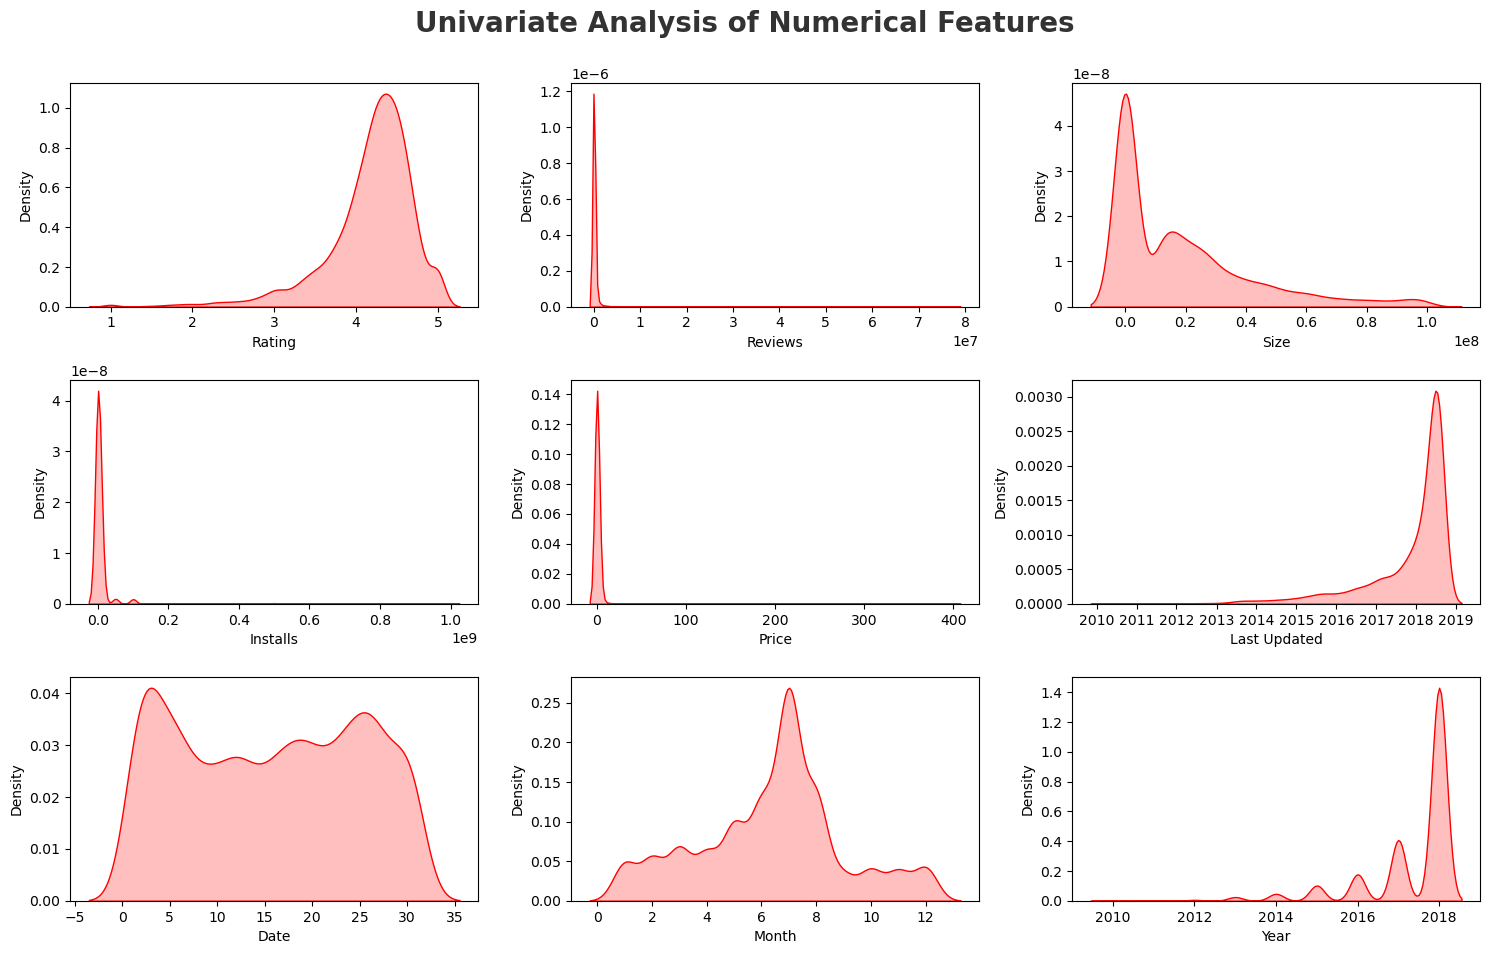

In [728]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)

for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_feature[i]], shade = True, color = 'r')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()
plt.show()

In [213]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Date            9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [217]:
df_copy['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [219]:
df_copy[['Rating']].mode()

,Rating
0,4.3


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [222]:
df_copy[['Size']].describe()

,Size
count,8.432000e+03
mean,1.837017e+07
std,2.329383e+07
min,1.000000e+00
25%,5.300000e+00
50%,1.200000e+07
75%,2.800000e+07
max,1.000000e+08


In [224]:
df_copy[['Size']].mode()

,Size
0,11000000.0


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [227]:
df_copy['Installs'].describe()

count    9.659000e+03
mean     7.777507e+06
std      5.375828e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [229]:
df_copy[['Installs']].mode()

,Installs
0,1000000


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [515]:
df_copy[['Year', 'Month']].min()

Year     2010
Month       1
dtype: int32

In [692]:
df_copy[['Last Updated']].describe()

,Last Updated
count,9659
mean,2017-10-30 19:34:02.074748928
min,2010-05-21 00:00:00
25%,2017-08-05 12:00:00
50%,2018-05-04 00:00:00
75%,2018-07-17 00:00:00
max,2018-08-08 00:00:00


In [694]:
df_copy[['Last Updated']].describe()

,Last Updated
count,9659
mean,2017-10-30 19:34:02.074748928
min,2010-05-21 00:00:00
25%,2017-08-05 12:00:00
50%,2018-05-04 00:00:00
75%,2018-07-17 00:00:00
max,2018-08-08 00:00:00


In [696]:
df_copy[['Last Updated']].mode()

,Last Updated
0,2018-08-03


In [698]:
df_copy['Last Updated'].value_counts().max()

252

In [ ]:
mod = df_copy['Last Updated'].mode()[0]
df_copy['Last Updated'].value_counts()[mod]

### Observations
1. Rating: right skewed, meaning that, in general, there are more positive ratings than negative with the most ratings being around 4.3. the median being 4.3 confirms the presence of more positive ratings: if 50% of the ratings are higher or equal than 4.3, it means that 50% of the data are between 4.3 and 5 (which clearly is a shorter range than 0 to 4.3).
2. Reviews: the count of Reviews doesn't really make much sense since the data in this category is already a count: the number of reviews is hardly the same across multiple apps, there counting how many reviews are the same is, not only not useful, but also conceptually wrong. the best approach here would be to understand what app, genre, maybe compared to number of downloads or to devices, has the biggest number of reviews
3. Size: left skewed, meaning that most apps have a smaller size and the most frequent value here (mode since it's a skewed distribution) is 11000000.0 bytes or 11 MB. This is also confirmed by the median = 12 MB, which is closer to the max = 100 MB than to the min =  0.00000095 MB.
4. Installs: similarly to Reviews, this is already a count per app, so counting the single value of this feature is a count of count. It would be better instead to analyze these numbers next to the specific app, the category of the app, in a timeframe and/or per type of device
5. Price: distribution is right skewed, which tells us that most of the prices for apps is little. The mode = 0 also confirms that most apps are free and just a couple above 350
6. Last Updated: the count of this feature tells us that most apps where update in 2018, which is also the year of the series. This is probably consistent with the incremental access to smart phones and, consequently, the usage of apps. The 5-numbers sumary and the shape (left skewed) of the ditribution for this variable seem to be in line with this hypothesis: in fact 50% of the updates took place after 2018-05-03 with the majority of updates on 2018-08-03 (count of mode for 2018-08-03 = 252), which is almost at the end of the series.  
After splitting Last Updated in date, month and year, we can get a better zoom on this variable: the date appear to be somewhat constant with major peaks at the beginning (between the 1st and the 5th) and the end of the month (between the 25th and the 30th); the month(s) with most updates appears to be the 6th, the 7th and the 8th; the years appear to have peaks in 2016, 2017 and 2018, with the last one being extremely higher than the previous two.
We can also see that these last variables are mostly affected by the high number of updates in 2018, so previous years could have different date and month of most updates.

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

### Univariate Analysis of Categorical features

In [758]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10472
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9660 non-null   float64       
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Date            9659 non-null   float64       
 14  Month           9659 non-null   float64       
 15  Year    

In [830]:
df_copy[df_copy['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [848]:
(df['Type'].map(type) == str).value_counts()

Type
True     10840
False        1
Name: count, dtype: int64

In [852]:
(df['Type'].map(type) == str).all()

False

In [870]:
df[df['Type'].map(type)!=str]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [888]:
df_copy.drop(df_copy.index[9148], inplace = True)

#or

df_copy=df_copy.drop(df_copy.index[9148])

In [890]:
(df_copy['Type'].map(type) == str).all()

True

In [892]:
df_copy['Type'].isnull().sum()

0

In [934]:
(df_copy['Type']=='Free').value_counts()

Type
True     10038
False      800
Name: count, dtype: int64

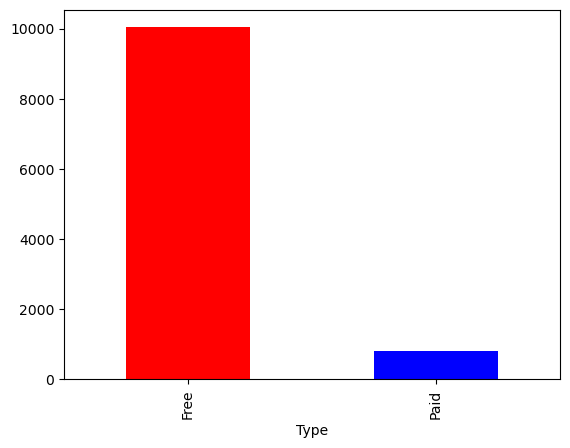

In [944]:
df_copy['Type'].value_counts().plot(kind = 'bar', color = ['red','blue'])
plt.show()

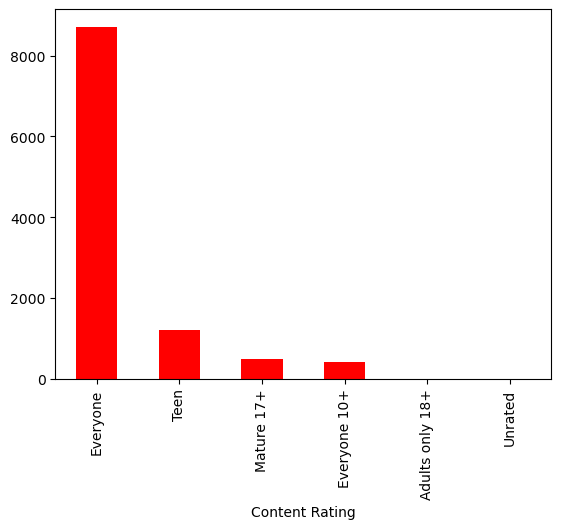

In [948]:
df_copy['Content Rating'].value_counts().plot(kind = 'bar', color = 'red')
plt.show()

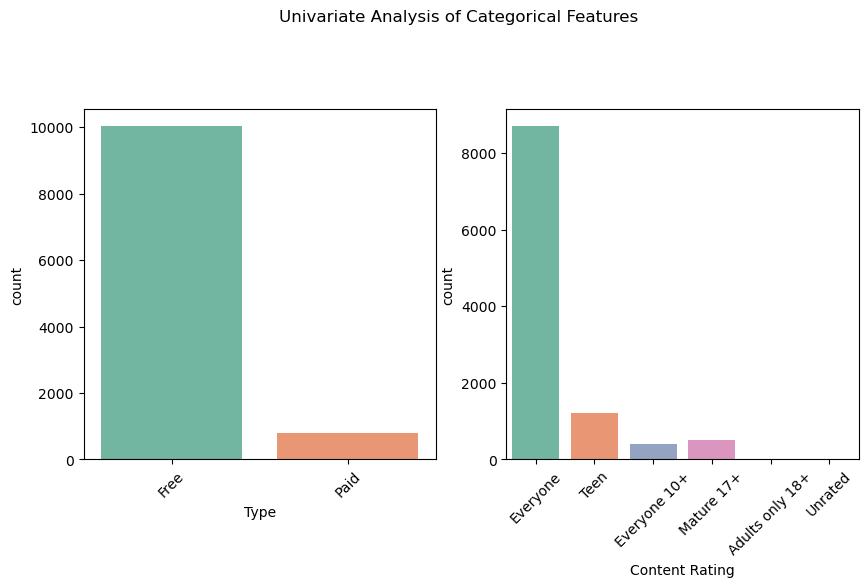

In [1050]:
#let's merge together the previous two barplots in one plot
series = ['Type','Content Rating']

plt.figure(figsize = (10,10))
for i, col in enumerate(series):
    plt.subplot(2,2,i+1)
    sns.countplot(x = col, data = df_copy, palette = 'Set2')
    plt.xticks(rotation =45)

plt.suptitle('Univariate Analysis of Categorical Features')
plt.show()

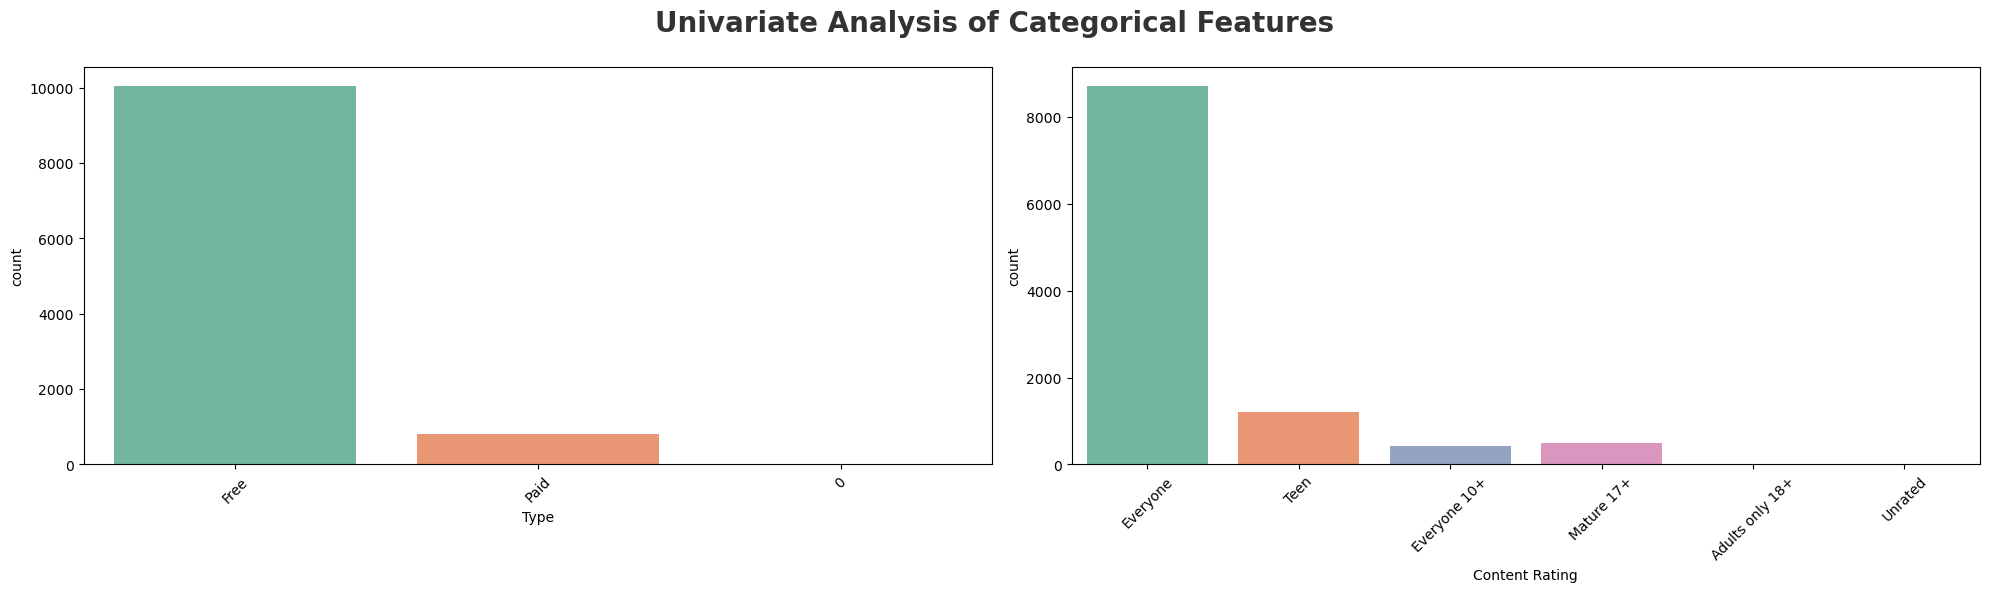

In [1044]:
series = ['Type','Content Rating']

plt.figure(figsize = (20,10))

for col in range(0,len(series)):
    plt.subplot(2,2,col+1)
    sns.countplot(x = df[series[col]], palette = 'Set2')
    plt.xlabel(series[col])
    plt.xticks(rotation =45)

plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()   
plt.show()

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

## What are the most common prices for apps

#### 1.Code version 

In [232]:
df_copy[['Price']].describe()

,Price
count,9659.000000
mean,1.099299
std,16.852152
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,400.000000


In [234]:
df_copy[['Price']].mode()

,Price
0,0.0


In [236]:
df_copy['Price'].info()

<class 'pandas.core.series.Series'>
Index: 9659 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 150.9 KB


In [238]:
df_copy['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [289]:
df_copy['Price'].value_counts().sort_index().head(10)

Price
0.00    8903
0.99     145
1.00       3
1.04       1
1.20       1
1.26       1
1.29       1
1.49      46
1.50       1
1.59       1
Name: count, dtype: int64

#### 2. Visual version

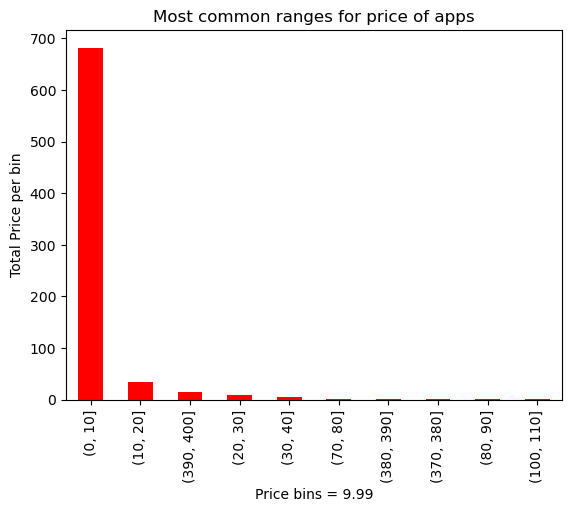

In [439]:
bins = range(0, 401, 10)

df_copy['Price_bins'] = pd.cut(df_copy['Price'], bins = bins)
df_copy['Price_bins'].value_counts().sort_index().sort_values(ascending = False).head(10).plot(kind = 'bar', color='red')

plt.xlabel('Price bins = 9.99')
plt.ylabel('Total Price per bin') 
plt.title('Most common ranges for price of apps')
plt.show()

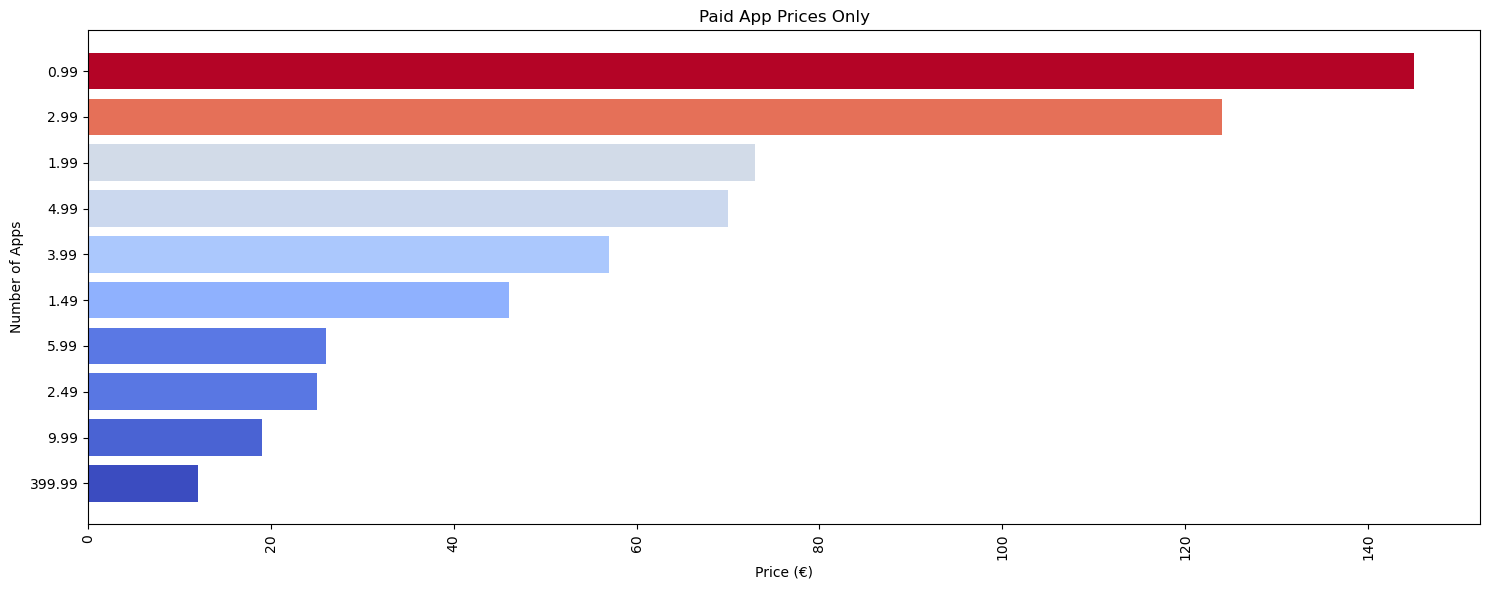

In [411]:
paid_prices = df_copy[df_copy['Price'] > 0]
categories = paid_prices['Price'].value_counts().sort_index()
categories = categories.sort_values(ascending = False).head(10)
categories = categories.sort_values()
categories.index = categories.index.astype(str) 

plt.figure(figsize=(15, 6))
norm = plt.Normalize(categories.min(), categories.max())
colors = cm.coolwarm(norm(categories)) 
plt.barh(categories.index,categories.values, color = colors)
plt.title('Paid App Prices Only')
plt.xlabel('Price (€)')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Since the categories are numerical, matplotlib will consider them as continuos. In fact, many values are very close to each other (0.99, 1.0, 10.4) and the consequence is that they will be displayed as a uniqum and not as single categories.  
In order to avoid this problem we need to convert this numbers to categories that Python can recognise as such, this is why we converted them to str with the line:
<span style="color:red">categories.index = categories.index.astype(str).</span> 

This conversion is often needed, especially when:
- Your x-axis values are numeric (like prices or years),
- But you want to treat them as categories (like unique price points),
- And you want a clean bar chart without merging or compression.

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

#### Most present apps in google playstore

#### 1. Code version

In [494]:
df_copy[['Category']].value_counts().sort_values(ascending = False).head(10).reset_index(name = 'Count')

,Category,Count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [502]:
df_copy[['Category']].mode()

,Category
0,FAMILY


In [500]:
df_copy[['Category']].value_counts().max()

1832

#### 2. Visual version

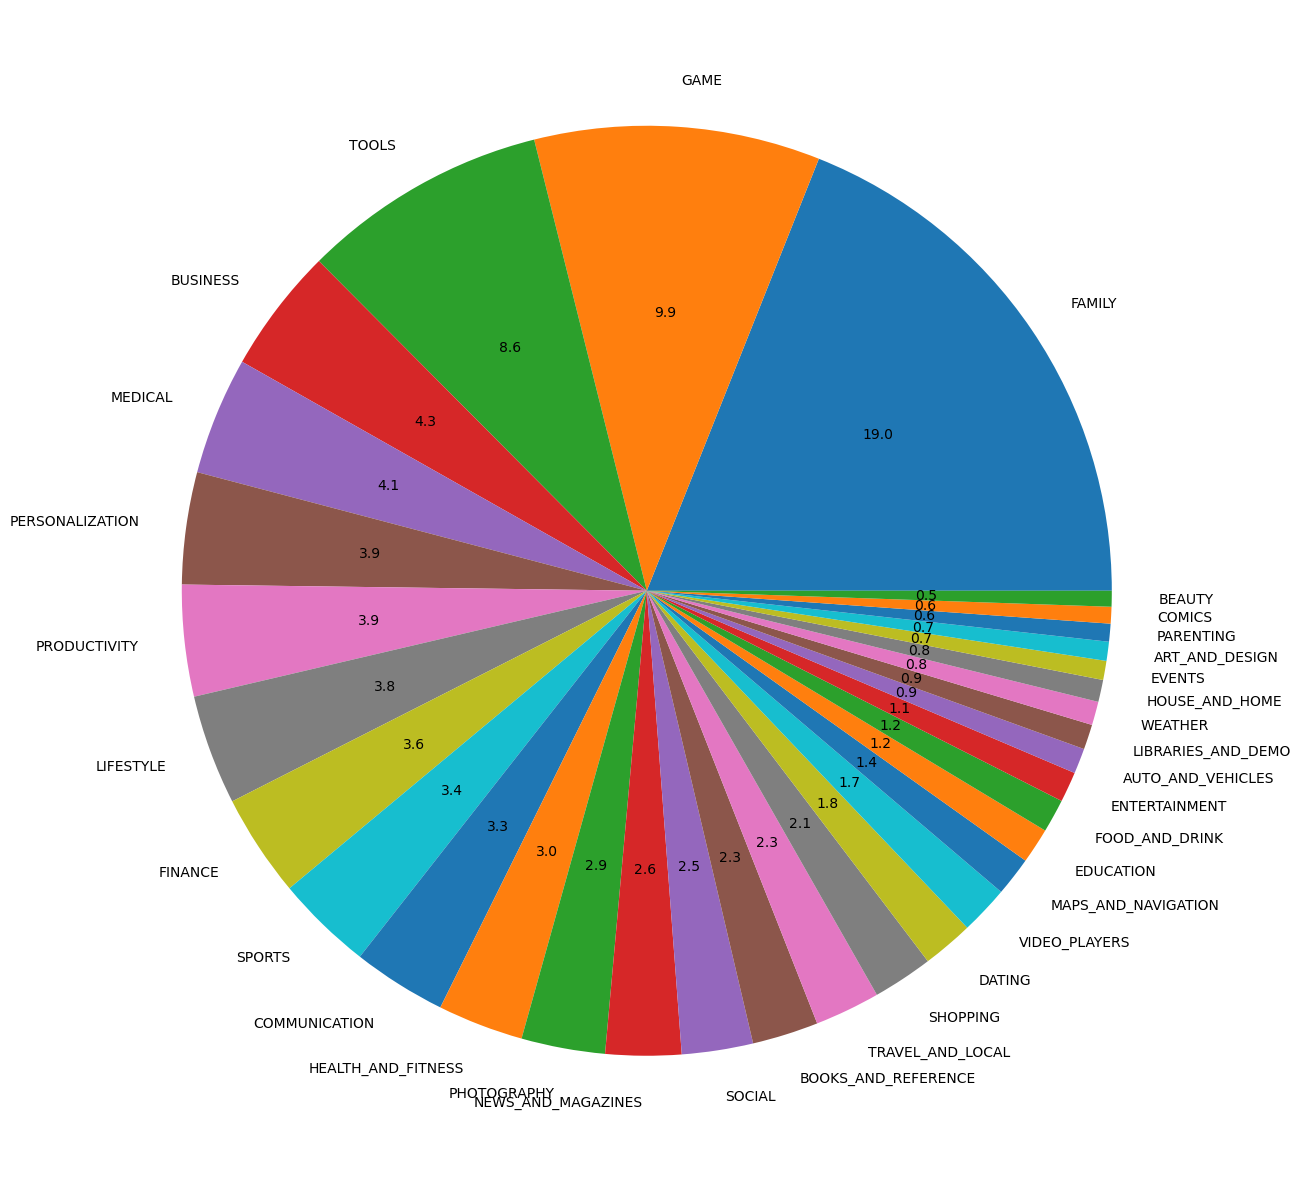

In [685]:
top_category = df_copy['Category'].value_counts()

plt.figure(figsize = (15,16))
plt.pie(top_category.values, labels=top_category.index,autopct='%1.1f')
plt.show()

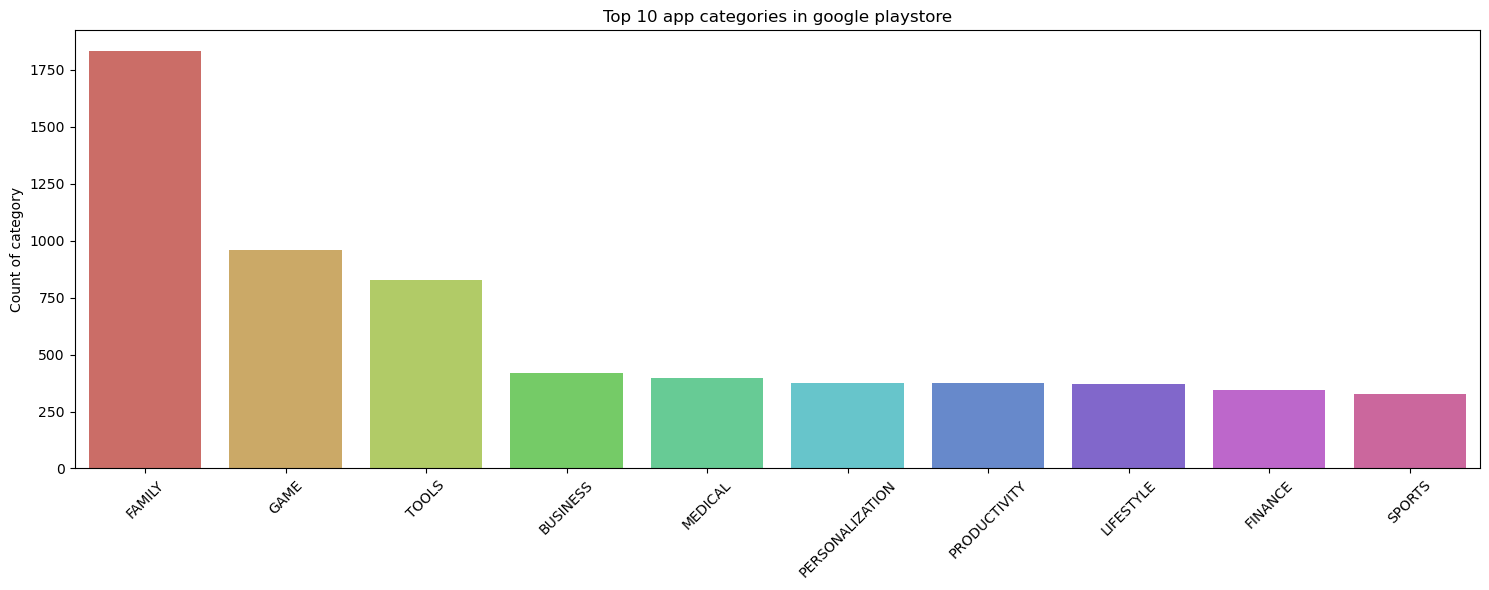

In [617]:
top_category = pd.DataFrame(df_copy['Category'].value_counts().reset_index())
top_category.columns = ['Category', 'Count'] 

plt.figure(figsize = (15,6))
sns.barplot(x='Category', y = 'Count', data = top_category[:10], palette = 'hls')
plt.xticks(rotation = 45)
plt.title('Top 10 app categories in google playstore')
# plt.xlabel('')
# plt.ylabel('Count of category')
plt.tight_layout()
plt.show()

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

## Which category has the largest number of installs?

#### 1. Code version

In [262]:
top_category_df = pd.DataFrame(df_copy.groupby('Category')['Installs'].sum())
top_category_df.sort_values('Installs', ascending = False)

,Installs
Category,
GAME,13878924415
COMMUNICATION,11038276251
TOOLS,8001771915
PRODUCTIVITY,5793091369
SOCIAL,5487867902
PHOTOGRAPHY,4649147655
FAMILY,4427941505
VIDEO_PLAYERS,3926902720
TRAVEL_AND_LOCAL,2894887146


In [264]:
top_category_df = pd.DataFrame(df_copy.groupby('Category')['Installs'].sum().sort_values(ascending =False).head(5))
top_category_df

,Installs
Category,
GAME,13878924415
COMMUNICATION,11038276251
TOOLS,8001771915
PRODUCTIVITY,5793091369
SOCIAL,5487867902


In [266]:
df_copy.groupby('Category')['Installs'].sum().sort_values( ascending = False).to_frame().head(1)

,Installs
Category,
GAME,13878924415


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

#### 2. Visualization

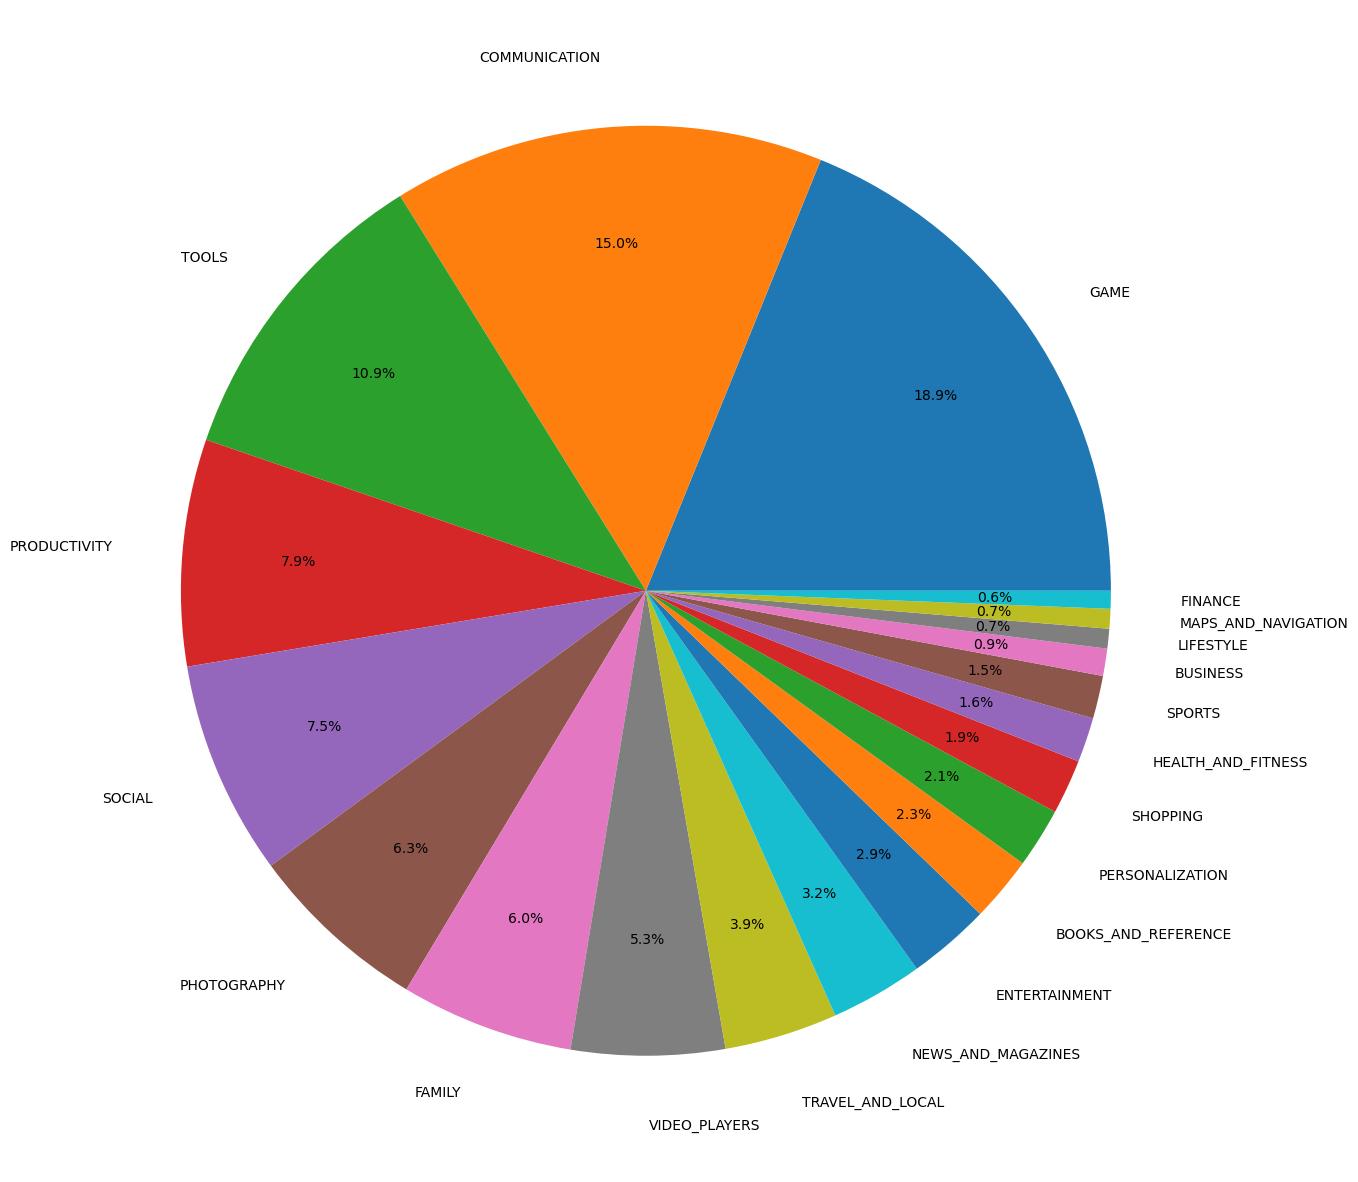

In [681]:
top_installs = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending = False).head(20)


plt.figure(figsize=(15,16))
plt.pie(top_installs.values, labels = top_installs.index,autopct = "%1.1f%%",
        labeldistance=1.15,
        pctdistance=0.75)

plt.show()

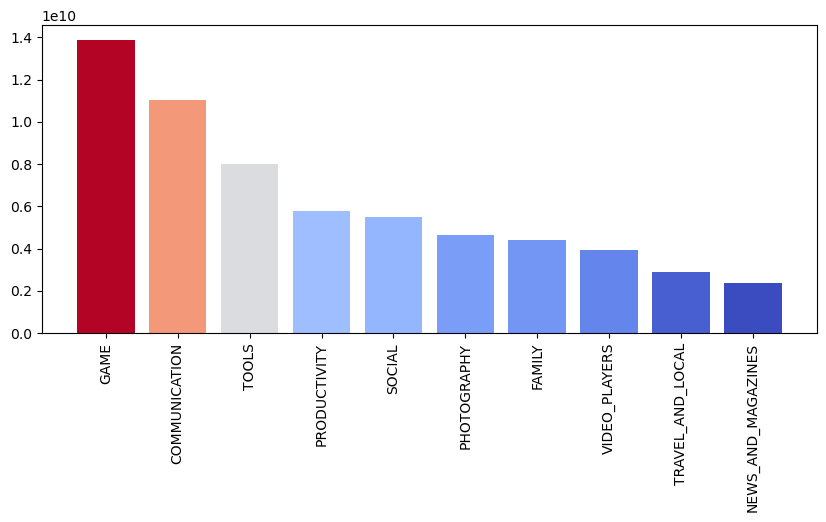

In [272]:
installs = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending = False).head(10)



norm = plt.Normalize(installs.min(), installs.max())
colors = cm.coolwarm(norm(installs)) 
plt.figure(figsize = (10,4))
plt.bar(installs.index, installs.values, color=colors)
plt.xticks(rotation=90)

plt.show()

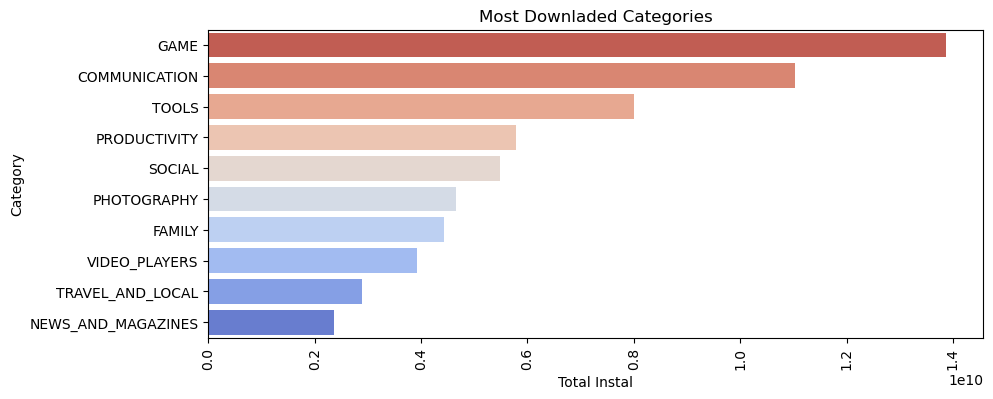

In [274]:
installs = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending = False).reset_index()
install_sorted = installs.head(10)

palette = sns.color_palette('coolwarm', len(install_sorted))[::-1]
plt.figure(figsize = (10,4))
sns.barplot(x='Installs', y='Category', data = install_sorted, palette = palette)
plt.xticks(rotation=90)
plt.xlabel('Total Instal')
plt.ylabel('Category')
plt.title('Most Downladed Categories')
plt.show()

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

## What are the top 5 most installed apps in each popular category?

#### 1. Code version

In [279]:

top_categories = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]

top_apps = {}

for item in top_categories:
    top_apps[item] = df_copy[df_copy['Category']==item].groupby(['App'])['Installs'].sum().sort_values(ascending=False).head(5)




df_top_apps = pd.concat(top_apps).reset_index()
df_top_apps.columns = ['Category', 'App', 'Installs']
df_top_apps

,Category,App,Installs
0,GAME,Subway Surfers,1000000000
1,GAME,Pou,500000000
2,GAME,Temple Run 2,500000000
3,GAME,Candy Crush Saga,500000000
4,GAME,My Talking Tom,500000000
5,COMMUNICATION,Google Chrome: Fast & Secure,1000000000
6,COMMUNICATION,Gmail,1000000000
7,COMMUNICATION,Messenger – Text and Video Chat for Free,1000000000
8,COMMUNICATION,Hangouts,1000000000
9,COMMUNICATION,Skype - free IM & video calls,1000000000


In [281]:
top_category = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
dfa = df_copy.groupby(['Category','App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
top_apps=[]

for item in top_category:
    df2 = dfa[dfa['Category'] == item]
    df3 = df2.head(5)
    top_apps.append(df3)

top_apps_df = pd.concat(top_apps, ignore_index=True)
top_apps_df

,Category,App,Installs
0,GAME,Subway Surfers,1000000000
1,GAME,Candy Crush Saga,500000000
2,GAME,Pou,500000000
3,GAME,Temple Run 2,500000000
4,GAME,My Talking Tom,500000000
5,COMMUNICATION,Skype - free IM & video calls,1000000000
6,COMMUNICATION,WhatsApp Messenger,1000000000
7,COMMUNICATION,Hangouts,1000000000
8,COMMUNICATION,Google Chrome: Fast & Secure,1000000000
9,COMMUNICATION,Gmail,1000000000


In [283]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Date            9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

#### 2 Visualization

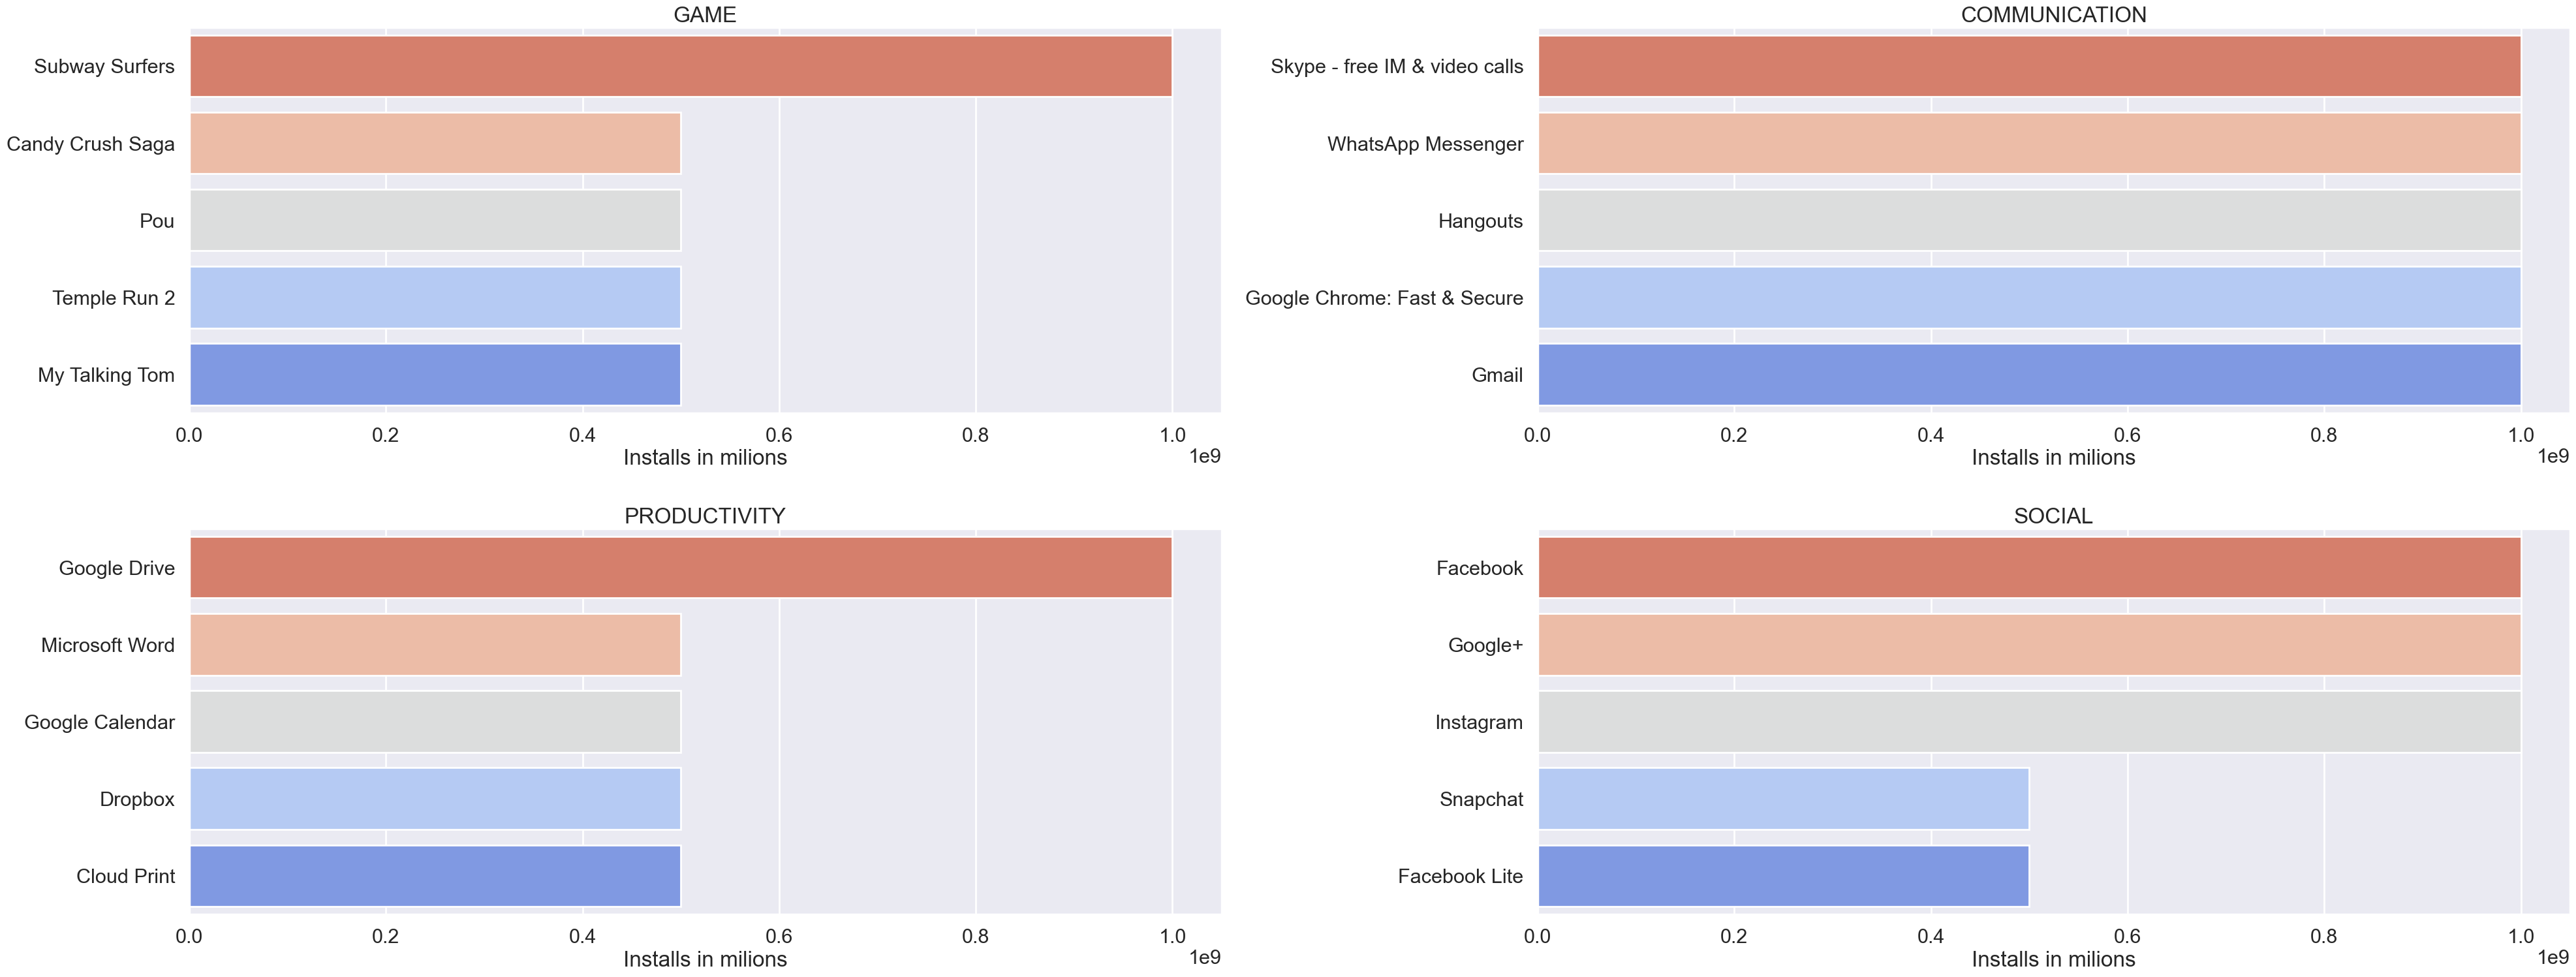

In [307]:
top_category = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
dfa = df_copy.groupby(['Category','App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize = (40,30))

for i,item in enumerate(top_category):
    df2 = dfa[dfa['Category'] == item]
    df3 = df2.head(5)
    ax = plt.subplot(4,2,i+1)
    sns.barplot(df3, x='Installs', y='App', palette = 'coolwar_r')
    plt.xlabel('Installs in milions')
    plt.ylabel('')
    ax.set_title(item)

  


plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## How many apps are on google playstore that get 5 ratings?

Let's start by making sure that every app has only one rating

In [1003]:
df[['App','Rating']]

,App,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1
1,Coloring book moana,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7
3,Sketch - Draw & Paint,4.5
4,Pixel Draw - Number Art Coloring Book,4.3
...,...,...
10836,Sya9a Maroc - FR,4.5
10837,Fr. Mike Schmitz Audio Teachings,5.0
10838,Parkinson Exercices FR,NaN
10839,The SCP Foundation DB fr nn5n,4.5


When can make sure that every app has only one rating by making sure that the total number of unique app is the same number of total rows for app.

In [1091]:
df_copy['App'].nunique()

9659

In [1093]:
df_copy['App'].shape[0]

9659

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

#### 1. Code Version

In [1051]:
(df_copy['Rating'] == 5).sum()

271

In [1077]:
df_copy['Rating'].value_counts().sort_index(ascending = False).head(1)


Rating
5.0    271
Name: count, dtype: int64

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [1303]:
my_dict = {x: x**2 for x in range(1,11)}
print(my_dict)

###
#Inverrting keys and values from an existinf dictionary
new_dict = {my_dict[key]:key for key in my_dict} 
print(new_dict)


{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81, 10: 100}
{1: 1, 4: 2, 9: 3, 16: 4, 25: 5, 36: 6, 49: 7, 64: 8, 81: 9, 100: 10}
